
## <center>    Gradient Descent
#####<center> **Name** - Masood Ahmed
<br/>
<br/>

### **Task** <br>
**Dataset:** https://www.kaggle.com/datasets/mirichoi0218/insurance <br>
The data contains medical information and costs billed by health insurance companies. It contains 1338 rows of data and the following columns: age, gender, BMI, children, smoker, region and insurance charges. <br> <br>
Implement gradient descent on this dataset. <br> <br>
To reduce the efforts for data processing, you can just use the features including age,
BMI and children to predict insurance charges.
<br><br>
Implement the equations of gradient descent yourselves.
<br>
<br> Tune the learning rate and plot the loss curve:<br>
* X axis: num iterations
* Y axis: loss values
</span>

**Dataset Discription:**

The dataset consists of several columns, each representing different attributes or features related to health insurance:

- **age:** This column represents the age of the primary beneficiary, likely referring to the age of the insured individual.

- **sex:** Here, the dataset includes information about the gender of the insurance contractor, with possible values being "female" or "male."

- **bmi:** The BMI, or Body Mass Index, is provided as an indicator of body weight. It offers insights into whether an individual's weight is relatively high or low compared to their height. The BMI is computed as weight in kilograms divided by the square of height in meters. Ideally, a BMI falls within the range of 18.5 to 24.9 to indicate a healthy weight.

- **children:** This column reflects the number of children covered by health insurance or, more broadly, the number of dependents for the primary beneficiary.

- **smoker:** The dataset includes information about whether the individual is a smoker or a non-smoker, which is a significant factor in health insurance considerations.

- **region:** It specifies the beneficiary's residential area in the United States and includes regions like northeast, southeast, southwest, and northwest.

- **charges:** This column contains data regarding individual medical costs billed by health insurance, which is a fundamental aspect of health insurance analysis and evaluation.

This dataset provides valuable information for exploring various aspects of health insurance, including age demographics, gender distribution, BMI, the number of dependents, smoking habits, regional differences, and individual medical charges. It serves as a practical and illustrative dataset for machine learning and data analysis projects, particularly in the context of health insurance-related applications.

## Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset

In [1]:
# Importing Necessary Libraries
import numpy as np #Data manipulation
import pandas as pd #Data manipulation
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

In [2]:
# To remove warnings regaridng deprecated functions in different versions of different libraries
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting google drive to get the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
insurance = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/FITE3010-Assignment2/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Initial Observation:** The insurance data given is quite a small data-set with only 1338 datapoints. There are a set of features describing the age, sex, bmi, children, smoker and reigion for each instance. This is all compared against the charges on the health insurance.


## Exploratory Data Analysis

In [5]:
# choosing 3 features only as suggested and dropping other columns
insurance = insurance.drop(columns=['sex', 'smoker', 'region'])
insurance.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [6]:
# getting general statistics
styled_data = (
    insurance.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_data

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
n, m = insurance.shape
print(f"Number of columns: {m} columns\nNumber of rows: {n} rows")

Number of columns: 4 columns
Number of rows: 1338 rows


In [8]:
# checking for datatypes
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [9]:
# checking for null values
insurance.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

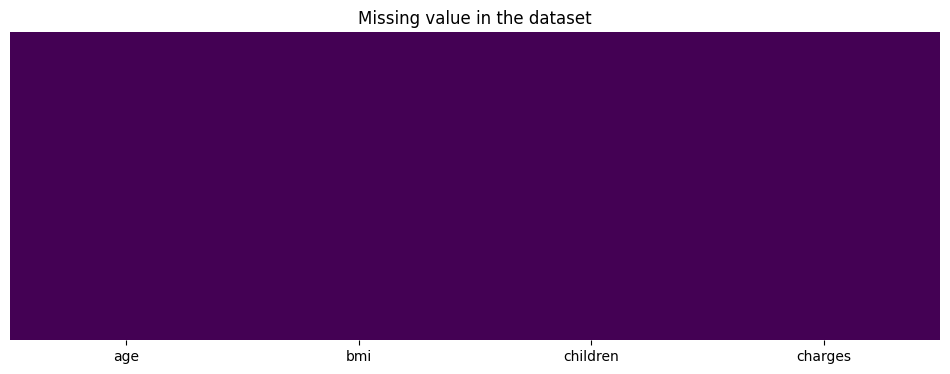

In [10]:
# Visualising any missing values for counter check purposes
plt.figure(figsize=(12,4))
sns.heatmap(insurance.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the data sex

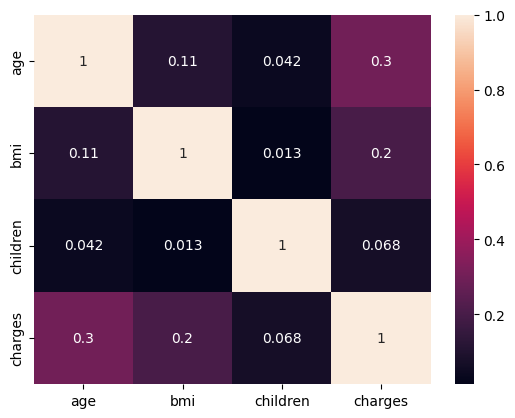

In [11]:
# correlation plot
corr = insurance.corr()
sns.heatmap(corr, annot= True);

We don't see any extra-ordinary co-relation of age, bmi, children with charges.

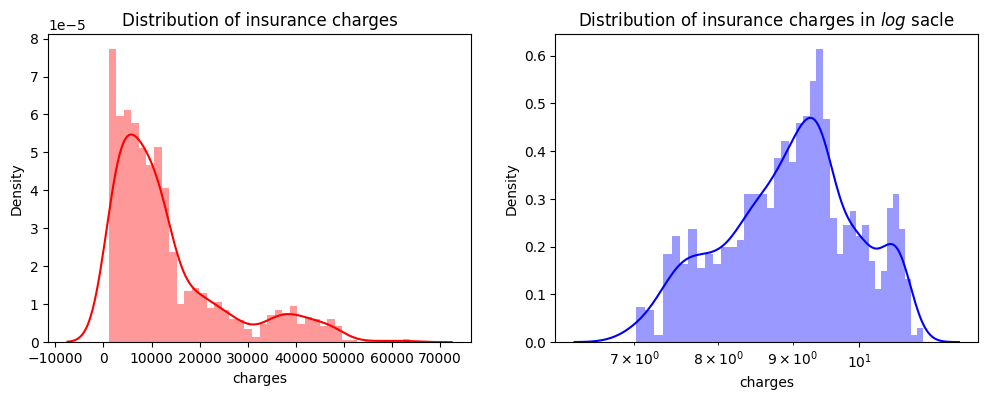

In [12]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance['charges'],bins=40,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log(insurance['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

The distribution of the charges shows a the data is positively skewed. When the log is taken, the data looks much better.

Text(0.5, 1.0, 'Distribution of bmi')

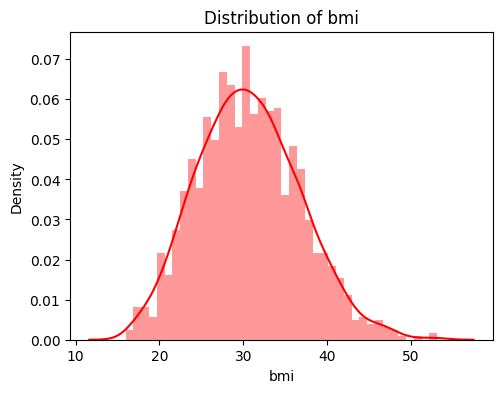

In [13]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance['bmi'],bins=40,color='r',ax=ax)
ax.set_title('Distribution of bmi')

<BarContainer object of 1338 artists>

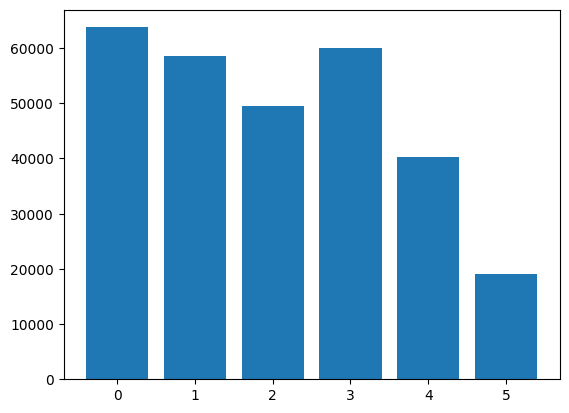

In [14]:
plt.bar(insurance['children'],insurance['charges'])

# Processing Data and Feature Scaling

In [15]:
X = insurance[['age', 'bmi', 'children']].values
y = insurance['charges'].values

In [16]:
# Normalize the features to make sure features are on a similar scale
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [17]:
# changing to log scale as we saw earlier that log scale showed a kind of normal distribution
y = np.log(y)
y

array([ 9.73417643,  7.45330245,  8.40053847, ...,  7.39623314,
        7.60486709, 10.27991376])

# How Gradient Descent Works


 As we have more that one variables, we will use **Gradient Descent for Multivariate Linear Regression** where we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. In general, if we have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.


In our dataset, when we look at the shape of dataset it has return as (1338,4).So there are $\mathbf{m=1338}$ training exaple and $\mathbf{n=4}$ independent variable. The target variable here is charges and remaining 3 variables such as age, bmi, children are independent variable. Then the hypothesis function looks like

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 bmi + \theta_3 children }$$

We start with guesses for the $\theta$ parameters and further use iterations to calculate the actual approximate values. To achieve this we use the cost function which evaluates the quality of the fit $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x) - y)^{2}$$
If the fit of the model is perfect, $h_{\theta}(x)$ will be the same as $y$ and so $J(\theta)$ (the cost) will be $0$. Any deviation from this perfect fit will increase the cost as the difference between the calculated and actual y value is squared. If we take the partial derivative of the cost function with respect to each parameter at a time.
$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}$$
$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}x$$
We find the slope of the cost function for any set of values of the parameters. Our aim is to change the parameters to reduce this slope to 0 (the minima) and in so doing, minimize $J(\theta)$.


In [18]:
def compute_cost(m, h, y):
    return (1 / (2 * m)) * np.sum(np.square(h - y))

def gradient_descent(X, y, learning_rate, epochs):
    m, n = X.shape  # m: number of samples, n: number of features
    ones = np.ones((m, 1))  # for setting first theta_1 as 1's
    X = np.concatenate((ones, X), axis=1)  # New X with X0's = 1
    n += 1  # increase n for the added intercept term
    theta = np.ones(n)  # parameter initialization / guessing with 1's
    h = np.dot(X, theta)  # Compute hypothesis

    cost = np.ones(epochs)
    for epoch in range(epochs):
        theta[0] -= (learning_rate / m) * np.sum(h - y)
        for j in range(1, n):
            theta[j] -= (learning_rate / m) * np.sum((h - y) * X[:, j])
        h = np.dot(X, theta)
        cost[epoch] = compute_cost(m, h, y)

    return cost, theta

## Tuning Parameters to get the best loss curve possible

### With Learning Rate of 0.001

In [27]:
# Calculating theta and cost
learning_rate = 0.001
itr = 2000
cost, theta = gradient_descent(X, y, learning_rate, itr)
print(theta)

[8.00372067 0.50811595 0.18005831 0.23780035]


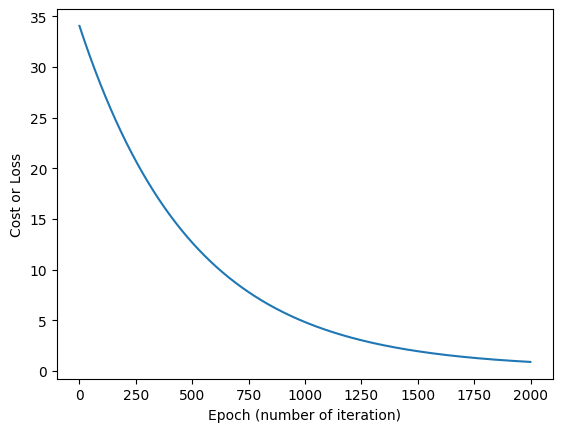

Lowest cost =0.9073961277380614
 Cost after 2000 iterations = 0.9073961277380614


In [28]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

### With Learning Rate of 0.01

In [29]:
# Calculating theta and cost
learning_rate = 0.01
itr = 2000
cost, theta = gradient_descent(X, y, learning_rate, itr)
print(theta)

[9.09865871 0.47225832 0.06871792 0.12736459]


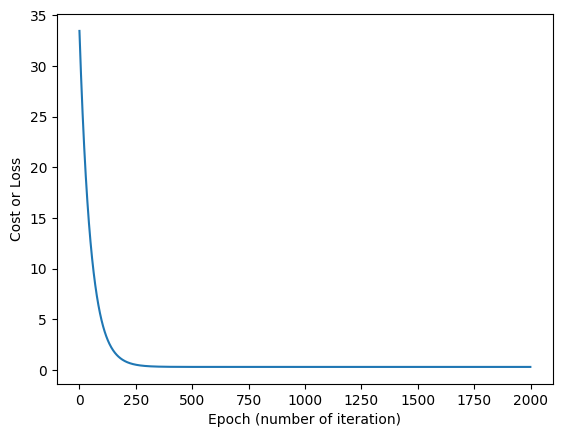

Lowest cost =0.2942508844928195
 Cost after 2000 iterations = 0.2942508844928195


In [30]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

### With Learning Rate of 0.1

In [21]:
# Calculating theta and cost
learning_rate = 0.1
itr = 2000
cost, theta = gradient_descent(X, y, learning_rate, itr)
print(theta)

[9.09865873 0.47225833 0.06871792 0.12736459]


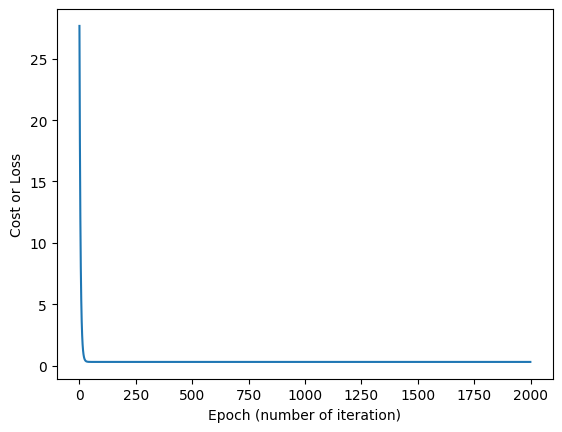

Lowest cost =0.2942508844928193
 Cost after 2000 iterations = 0.29425088449281933


In [22]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

## <center> **Thank You for Reading! Happy Coding :)**